<a href="https://colab.research.google.com/github/mkkim007/AIFFEL/blob/main/%5BE_05%5DFaceNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [E-05] 나랑 닮은 연예인은 누구?

임베딩 : 고차원의 정보를 저차원으로 변환하면서 필요한 정보를 보전하는 것

In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 7.8 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=99c3dbce6e0718539163e9877ed55cbf07c48dce9c315fe7812c6c17b3f42e06
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


matplotlib 폰트 ->글꼴 깨짐 문제 해결

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,158 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import dlib
import face_recognition
import os
%matplotlib inline
import cv2
import matplotlib 
matplotlib.font_manager._rebuild()  #Thanks to 형준

## 1.사진 모으기

구글 드라이브 마운트하기

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 1.1 나의 사진..ㅎ

윈도우에서 한글파일명을 가진 파일을 zip으로 압축한 후에 리눅스에서 풀면 파일명이 깨지는 현상이 발생한다. 이는 zip파일은 유니코드로 저장하지 않기때문이다. 그럴 때는  '-O cp949' 옵션을 넣어주면 해결 할 수 있다!

In [3]:
!mkdir images

!unzip -qq -O cp949 /content/gdrive/MyDrive/Data/me.zip -d /content/images

### 1.2 연예인 사진

In [4]:
!tar Jxvf /content/gdrive/MyDrive/Data/celebrity.tar.xz
!cp -r /content/celebrity/* /content/images

celebrity/
celebrity/윤균상.jpg
celebrity/이종석.jpeg
celebrity/박해일.jpeg
celebrity/이승철.jpeg
celebrity/윤종신.jpeg
celebrity/송중기.jpeg
celebrity/이민호.jpeg
celebrity/김래원.jpeg
celebrity/정우성.jpeg
celebrity/이희준.jpg
celebrity/이성민.jpg
celebrity/류승범.jpg
celebrity/한석규.jpg
celebrity/박정민.jpg
celebrity/조정석.jpg
celebrity/이대형.jpg
celebrity/심수창.jpeg
celebrity/조인성.jpg
celebrity/이광수.jpg
celebrity/한기범.jpg
celebrity/하승진.jpg
celebrity/서장훈.jpg
celebrity/김희철.jpg
celebrity/김구라.jpg
celebrity/잇섭.png
celebrity/딕헌터.jpeg
celebrity/영알남.png
celebrity/김경진.png
celebrity/박휘순.jpg
celebrity/박희순.jpg
celebrity/택연.jpg
celebrity/하현우.jpg
celebrity/김연우.jpeg
celebrity/유희열.jpeg
celebrity/신동엽.jpg
celebrity/성시경.jpg
celebrity/마동석.jpeg
celebrity/조정치.jpg
celebrity/황정민.jpg
celebrity/곽도원.jpg
celebrity/박찬욱.jpeg
celebrity/봉준호.jpg
celebrity/유지태.jpg
celebrity/최민식.jpg
celebrity/박신양.png
celebrity/백윤식.png
celebrity/이경규.jpeg
celebrity/최양락.jpg
celebrity/박완규.png
celebrity/김종서.jpg
celebrity/이승환.jpg
celebrity/윤도현.png
celebrity/김C.jpeg
celebrity/이승기.jpeg
cel

file_list: ['개코.jpeg', '크리스탈.jpg', '권태원.jpeg', '이범수.jpeg', '진.jpg', '오재원.jpg', '고창석.jpeg', '마크 러팔로.jpeg', '나3.jpg', '하현우.jpg', '조정치.jpg', '세훈.jpg', '잭 블랙.jpeg', '유리.jpg', '크리스 햄스워스.jpg', '류승범.jpg', '잭 갤리퍼내키스.jpg', '박찬욱.jpeg', '이종석.jpeg', '장동건.jpeg', '이승철.jpeg', '대도서관.jpeg', '윤균상.jpg', '리아.jpg', '앤드류 응.png', '윤종신.jpeg', '사무엘 L 잭슨.jpg', '김윤석.jpeg', '제프리 힌턴.jpg', '김광현.jpg', '아이유.jpg', '제이콥 배털론.jpg', '줄리엔강.png', '슈가.jpg', '미미.jpg', '승희.jpeg', '유아.jpg', '백윤식.png', '디오.jpeg', '유노윤호.jpg', '박건우.png', '유해진.jpg', '윤경신.jpg', '슬리피.jpg', '한효주.jpg', '문별.jpg', '김희철.jpg', '최무성.jpg', '김고은.jpeg', '지디.jpg', '뷔.png', '조인성.jpg', '트와이스정연.jpg', '개리.jpg', '김유정.jpg', '이승환.jpg', '비니.jpg', '조원희.jpg', '매드클라운.jpeg', '톰 홀랜드.jpg', '노무현.jpeg', '이말년.png', '유지태.jpg', '손예진.jpeg', '민니.jpg', 'bush.jpeg', '케빈 스페이시.jpeg', '트와이스쯔위.jpg', '기성용.jpg', '잭 니콜슨.jpeg', '박신양.png', '길.jpg', '강민경.jpg', '이재용.jpg', '박명수.jpg', '마동석.jpeg', '도지한.jpg', '박완규.png', '윤도현.png', '수호.jpg', '김상호.png', '김종서.jpg', '김구라.jpg', '박서준.jpeg', '티파니.jpg', '태

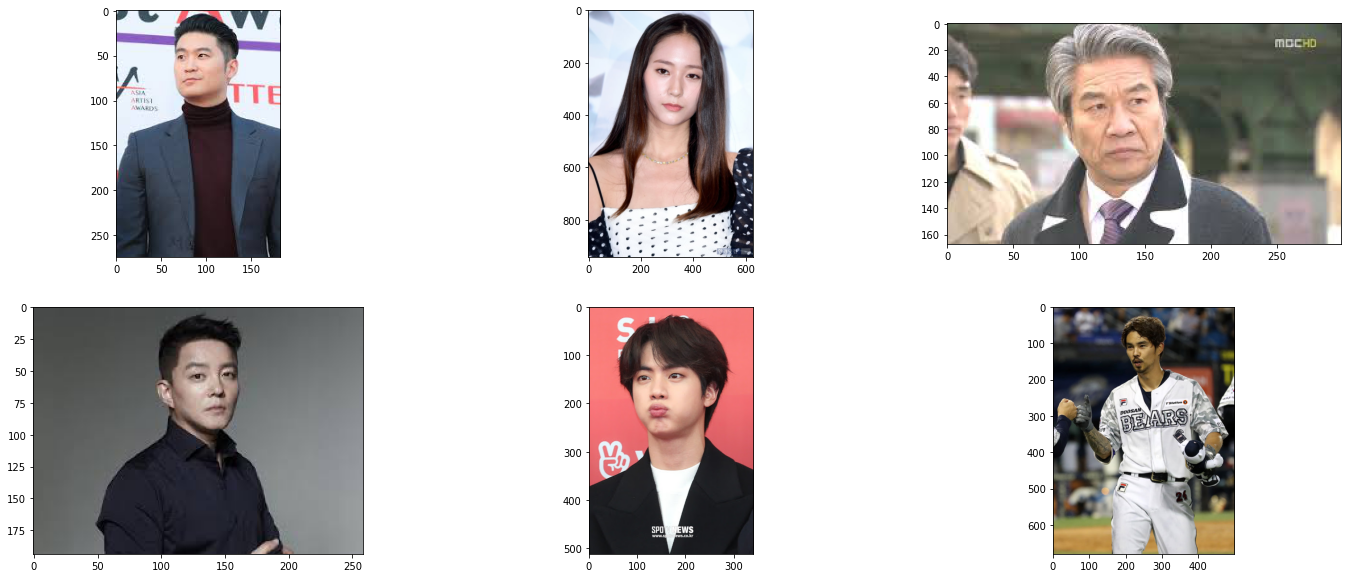

In [5]:
dir_path = "/content/images"
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))


#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

## 2.얼굴 영역 자르기

In [6]:
!mkdir cropped_images

In [7]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image) # 이미지에서 얼굴 영역의 좌표
    if face_locations == [] : return []     # 얼굴 검출이 안되는 경우 [] 
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [8]:
image_path = dir_path+'/obama.jpg'
face = get_cropped_face(image_path)

## 3.임베딩 추출하기

In [10]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding



[array([-0.08126256,  0.11014745, -0.01082445, -0.05268794,  0.01033718,
        -0.00813809, -0.07251757, -0.09226454,  0.19304717, -0.09246392,
         0.23908532,  0.06770284, -0.22123128, -0.14119357,  0.05562155,
         0.13705502, -0.17924429, -0.07232308, -0.11183279, -0.11370809,
         0.0395644 , -0.01019115,  0.09421775,  0.04493123, -0.12757549,
        -0.34449601, -0.05374936, -0.17703307,  0.00868223, -0.09721594,
        -0.09817182,  0.00278226, -0.17721353, -0.12789798,  0.03489836,
        -0.01991233, -0.00838929, -0.00132864,  0.18308596,  0.02447565,
        -0.12376569,  0.0995703 ,  0.02323563,  0.22983302,  0.28385252,
         0.06655712, -0.00558918, -0.0983355 ,  0.10058983, -0.23476952,
         0.06006293,  0.13415912,  0.08373035,  0.03900497,  0.10194533,
        -0.19337648,  0.01717629,  0.08978967, -0.16005114,  0.01892096,
         0.03082448, -0.06051282, -0.04526767,  0.04633339,  0.20678681,
         0.10299784, -0.12437528, -0.04905157,  0.1

In [11]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    i=0
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        i+=1
        face = get_cropped_face(img_path)       
        if face == []: #얼굴 검출이 안되는 경우
            print(img_path+" - 얼굴을 찾을 수 없음")   
            continue
        path_to_save = "cropped_images/"+ file
        pillow_image = Image.fromarray(face)
        pillow_image.save(path_to_save)
        embedding = get_face_embedding(face)

        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        else :
             print(img_path+" - 얼굴을 찾을 수 없음") 

        
    return embedding_dict

In [12]:
embedding_dict = get_face_embedding_dict(dir_path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


/content/images/나3.jpg - 얼굴을 찾을 수 없음
/content/images/사무엘 L 잭슨.jpg - 얼굴을 찾을 수 없음
/content/images/한효주.jpg - 얼굴을 찾을 수 없음
/content/images/이승환.jpg - 얼굴을 찾을 수 없음
/content/images/신비.jpg - 얼굴을 찾을 수 없음
/content/images/나4.jpg - 얼굴을 찾을 수 없음
/content/images/김대명.jpeg - 얼굴을 찾을 수 없음
/content/images/도아.jpeg - 얼굴을 찾을 수 없음
/content/images/신태용.jpg - 얼굴을 찾을 수 없음
/content/images/산들.jpeg - 얼굴을 찾을 수 없음


In [13]:
embedding_dict['trump']

array([-0.15962464,  0.20268655,  0.03236359,  0.02439231, -0.06226436,
        0.0514071 ,  0.07351796, -0.16823351,  0.06962208, -0.05557965,
        0.17270114, -0.05094172, -0.35293111, -0.03164373,  0.03792984,
        0.17343846, -0.13260125, -0.15357381, -0.23523535, -0.08442686,
       -0.00134151,  0.03210674, -0.08926155, -0.02670781, -0.09581175,
       -0.2579236 , -0.01057001, -0.11071666,  0.03133577, -0.07444926,
        0.05670559, -0.02273789, -0.19461143, -0.04576047,  0.00947575,
        0.01806061, -0.15026242, -0.07787324,  0.17577605,  0.0193326 ,
       -0.19744584, -0.03930523,  0.07374465,  0.20196036,  0.14767548,
       -0.01415397,  0.01724746, -0.11976209,  0.09462972, -0.24318142,
       -0.02755124,  0.12169893,  0.14837696,  0.17079782,  0.06952561,
       -0.15360464,  0.02005427,  0.08199152, -0.19544825,  0.10653655,
        0.11468485, -0.21902832, -0.07677592, -0.06791048,  0.105876  ,
        0.05921567, -0.06115698, -0.11171092,  0.23917486, -0.15

## 4.임베딩 사이 거리 측정

내얼굴 비교하기,,

In [14]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('나1', '증명사진')

0.3949213358990678

## 5.결과

In [15]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   

In [16]:
def get_nearest_face(name, top=4):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    return sorted_faces, sort_key_func,

In [27]:
sorted_faces, key = get_nearest_face('증명사진', 5)

순위 1 : 이름(트와이스사나), 거리(0.36236137110765104)
순위 2 : 이름(지호), 거리(0.36799838316779454)
순위 3 : 이름(아이즈원조유리), 거리(0.3818022108660886)
순위 4 : 이름(사쿠라), 거리(0.38425734604531847)
순위 5 : 이름(비니), 거리(0.38463611863671376)


## 6.시각화

crop한 이미지의 확장자를 jpg로 통일한다

In [18]:
! cd /content/cropped_images ; rename 's/.png/.jpg/' *
! cd /content/cropped_images ; rename 's/.jpeg/.jpg/' *

박진영.jpeg not renamed: 박진영.jpg already exists


In [19]:
def get_nearest_face_images(name, sorted_faces):
    path_to_save = "cropped_images/"
    img = cv2.imread(path_to_save + name +'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, axes = plt.subplots(5,3, figsize = (20, 20))

    for i in range(5):

        near_img = cv2.imread(path_to_save+sorted_faces[i+1][0]+ '.jpg') 
        near_img = cv2.cvtColor(near_img, cv2.COLOR_BGR2RGB)
        width = img.shape[1]
        height = img.shape[0]
        near_img = cv2.resize(near_img, (width, height))

        #https://asthtls.tistory.com/1011  이미지 합치기
        axes[i][0].set_xlabel(name)
        axes[i][0].imshow(img)
        axes[i][1].set_xlabel("mix")
        axes[i][1].imshow(img)
        axes[i][1].imshow(near_img, alpha=0.5)
        axes[i][2].set_xlabel(sorted_faces[i+1][0])
        axes[i][2].imshow(near_img)
    plt.rc('font', family='NanumBarunGothic')       #Thanks to 형준
    plt.show()



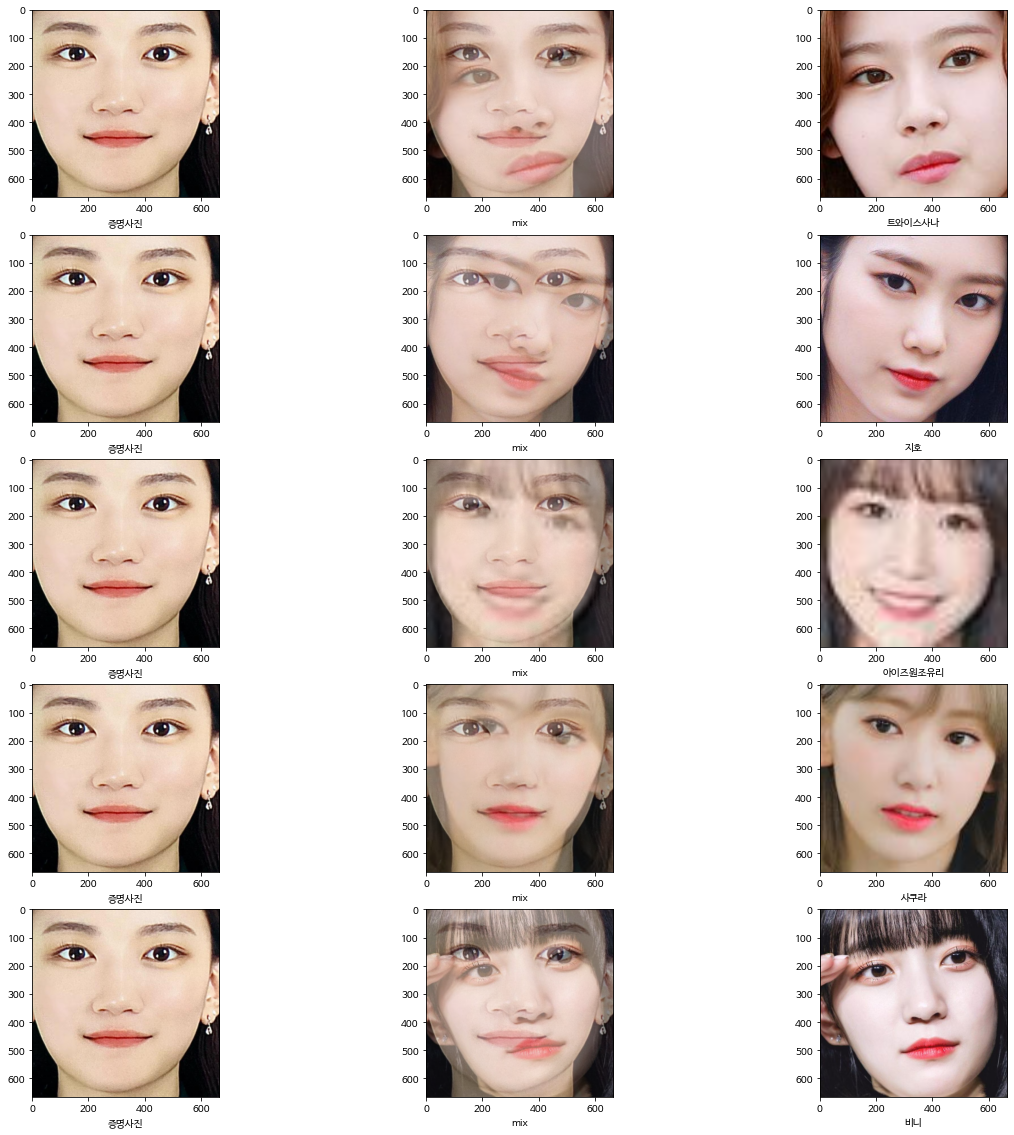

In [28]:
get_nearest_face_images('증명사진', sorted_faces)

In [21]:
sorted_faces, key = get_nearest_face('나1', 5)

순위 1 : 이름(우기), 거리(0.3466745291531629)
순위 2 : 이름(케이), 거리(0.34763479215740273)
순위 3 : 이름(사쿠라), 거리(0.3569498743138895)
순위 4 : 이름(아이즈원조유리), 거리(0.3665411696508014)
순위 5 : 이름(비니), 거리(0.3871224501388347)


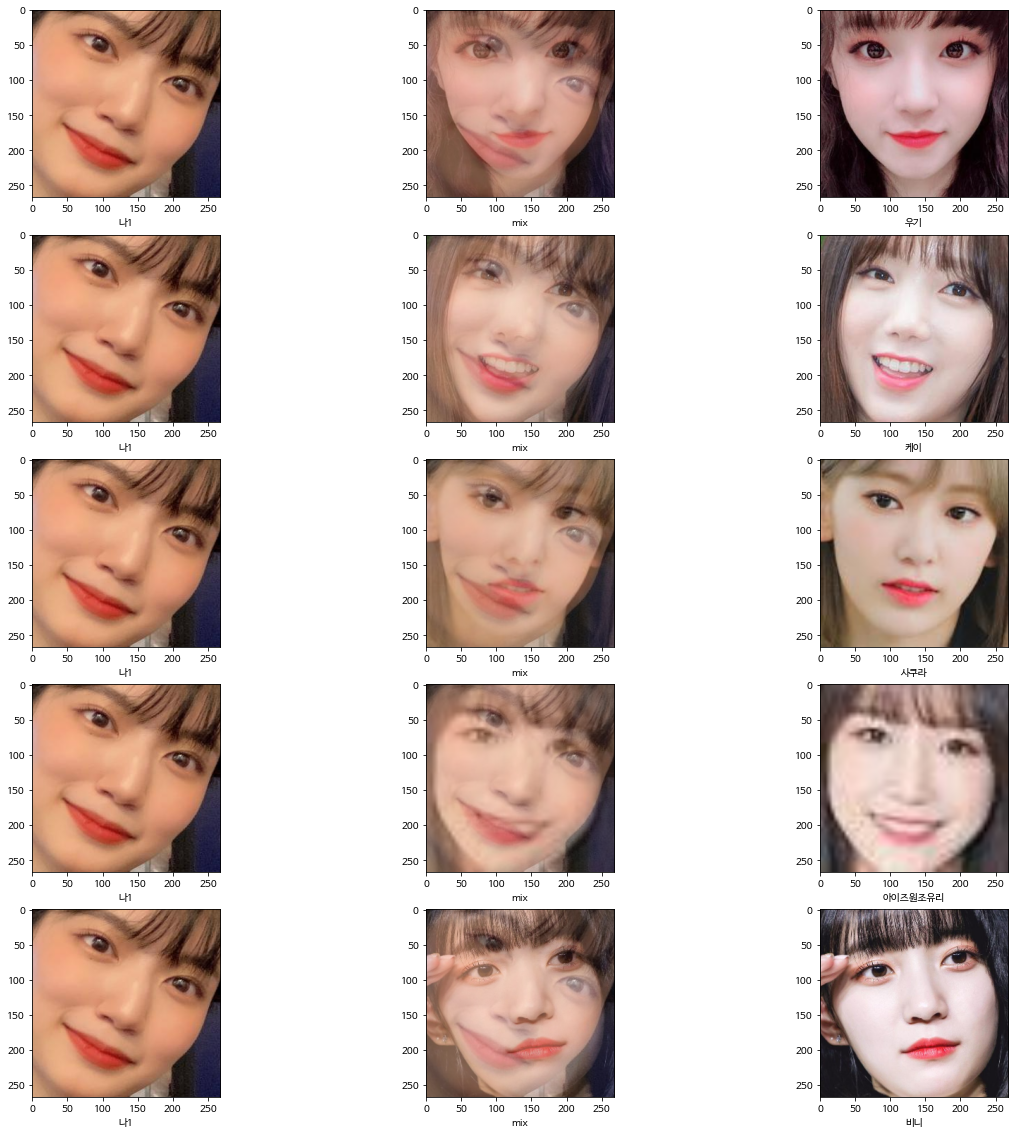

In [22]:
get_nearest_face_images('나1', sorted_faces)

허허 민망하게 다 아이돌로 나왔네요,,, 머쓱

In [24]:
sorted_faces, key = get_nearest_face('박명수', 5)

순위 1 : 이름(이승철), 거리(0.42375459454988507)
순위 2 : 이름(박휘순), 거리(0.42707115998014883)
순위 3 : 이름(박건우), 거리(0.43777782681515254)
순위 4 : 이름(정수빈), 거리(0.44884041106288786)
순위 5 : 이름(박해일), 거리(0.45170819165874726)


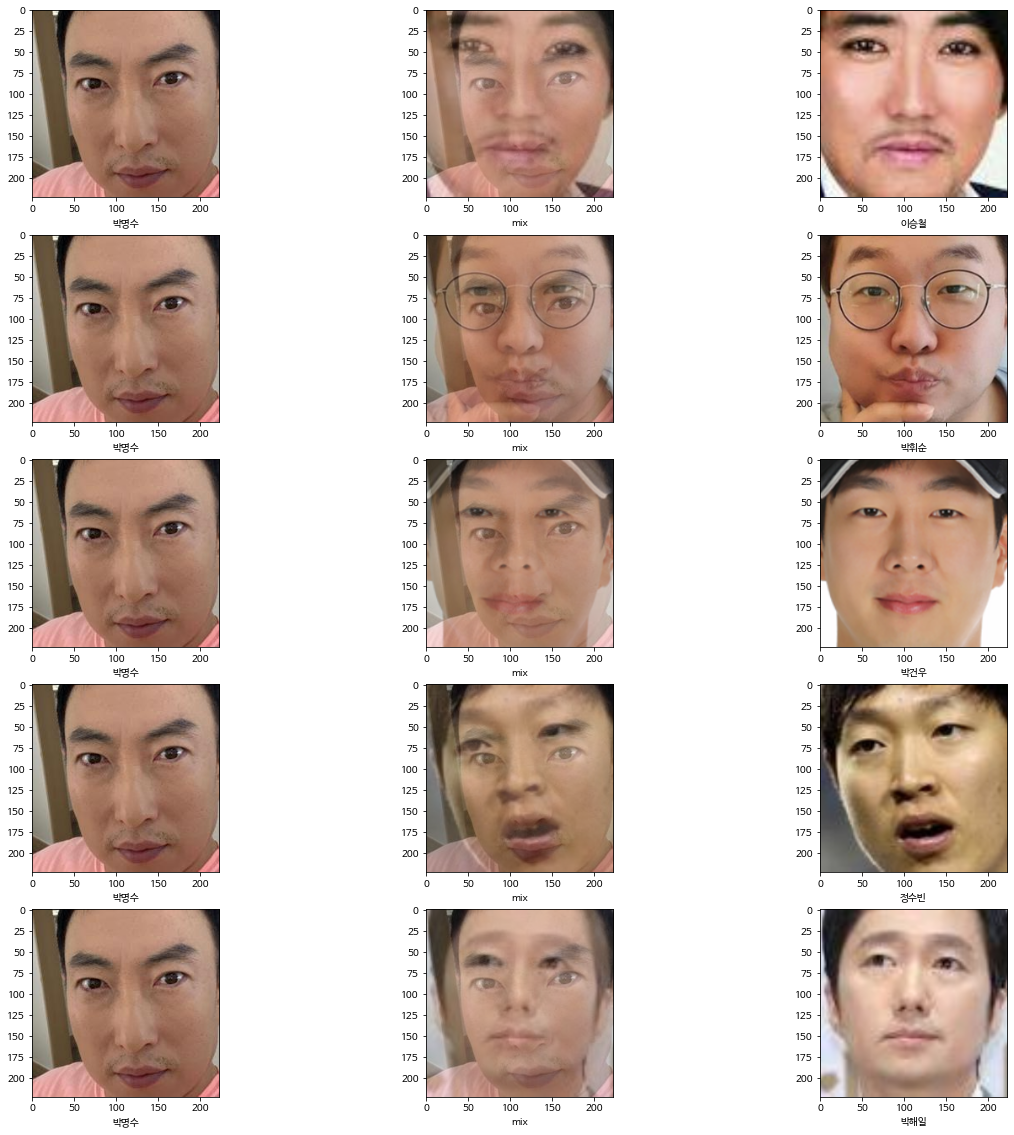

In [25]:
get_nearest_face_images('박명수', sorted_faces)

ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ아 웃기네요 

## 🤔회고록🤔
- NLP 임베딩할때는 잘 이해가 안됐는데 이번기회에 임베딩에 대해 좀 더 잘 이해가 된 것 같다
- 내사진끼리 가까운 거리 였으나 순위 top5에는 들지 못한걸 보아 성능이 별로 좋은 것 같지는 않다
- 시각화할때 한글이 깨지는 현상이 발생했는데 형준님 덕분에 해결했다!! 감사합니다 형준님